In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [63]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Diabeted Prediction.ipynb',
 'diabetes_prediction_dataset.csv',
 'Untitled.ipynb']

# Loading the Data


In [64]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Data Understanding

In [65]:
 ##the number of rows and columns present in the dataframe

df.shape   

(100000, 9)

In [66]:
 ##the number of columns present in the dataframe

df.columns         

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [67]:
##checking the datatype of each column

df.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [68]:
##finding the mean,max,standard deviation and other statistical measurements of each numerical columns

df.describe()      

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [69]:
##checking number of null values present in each columns

df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Feature Engineering

In [70]:
df=df.drop(columns='smoking_history')
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,27.32,6.2,90,0
99996,Female,2.0,0,0,17.37,6.5,100,0
99997,Male,66.0,0,0,27.83,5.7,155,0
99998,Female,24.0,0,0,35.42,4.0,100,0


In [71]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [72]:
##replacing male by 0,female by 1,and others by 2

df['gender'].replace(['Female','Male','Other'],[0,1,2],inplace=True)


In [73]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,27.83,5.7,155,0
99998,0,24.0,0,0,35.42,4.0,100,0


# Segregate x and y

In [74]:
x=df.drop(columns='diabetes')

In [75]:
y=df['diabetes']

In [76]:
x

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,25.19,6.6,140
1,0,54.0,0,0,27.32,6.6,80
2,1,28.0,0,0,27.32,5.7,158
3,0,36.0,0,0,23.45,5.0,155
4,1,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90
99996,0,2.0,0,0,17.37,6.5,100
99997,1,66.0,0,0,27.83,5.7,155
99998,0,24.0,0,0,35.42,4.0,100


In [77]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

# Split the data

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Model Building

In [187]:
##GaussianNB model

from sklearn.naive_bayes import GaussianNB

In [188]:
gb=GaussianNB()

In [189]:
gb.fit(X_train,y_train)

GaussianNB()

In [190]:
y_pred=gb.predict(X_test)

In [84]:
##checking the accuracy

from sklearn.metrics import accuracy_score

In [85]:
ac=accuracy_score(y_test,y_pred)

In [86]:
ac

0.90545

In [87]:
from sklearn import metrics

In [191]:
##confusion matrix

from sklearn.metrics import confusion_matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
matrix

array([[16992,   560],
       [ 1331,  1117]], dtype=int64)

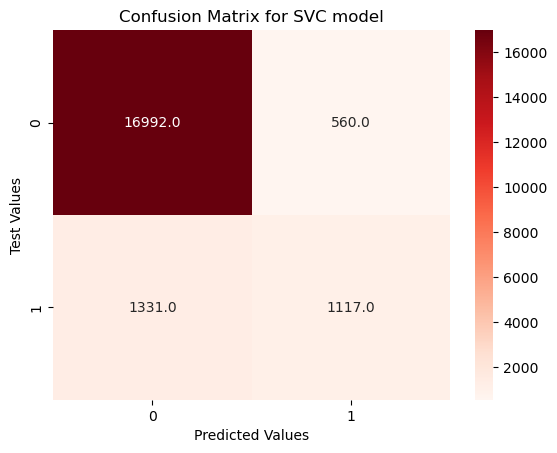

In [88]:
matrix=metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(matrix,annot=True,cmap='Reds',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")
plt.title("Confusion Matrix for SVC model")
plt.show()

In [180]:
##Logistic Regression

from sklearn.linear_model import LogisticRegression

In [181]:
lr=LogisticRegression()

In [182]:
lr.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [183]:
y_pred=lr.predict(X_test)

In [93]:
##checking the accuracy

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)

In [94]:
ac

0.95935

In [184]:
##confusion matrix

from sklearn.metrics import confusion_matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
matrix

array([[18150,   640],
       [  173,  1037]], dtype=int64)

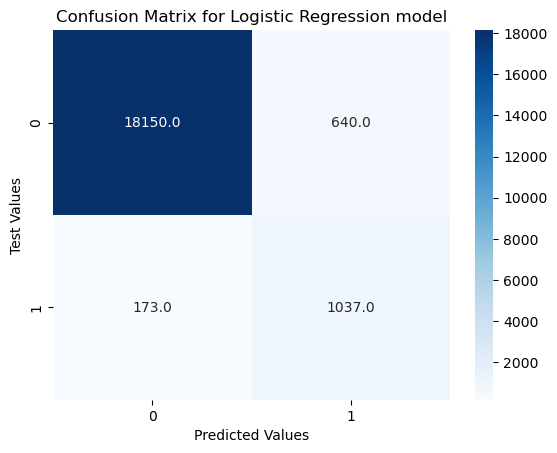

In [95]:
matrix=metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(matrix,annot=True,cmap='Blues',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")
plt.title("Confusion Matrix for Logistic Regression model")
plt.show()

In [174]:
##SVC 

from sklearn.svm import SVC

In [175]:
sv=SVC()

In [176]:
sv.fit(X_train,y_train)

SVC()

In [177]:
y_pred=sv.predict(X_test)

In [100]:
##checking the accuracy

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.9484

In [179]:
##confusion matrix

from sklearn.metrics import confusion_matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
matrix

array([[18323,  1032],
       [    0,   645]], dtype=int64)

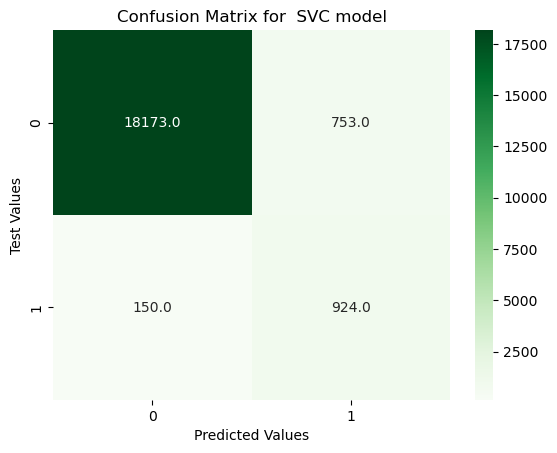

In [124]:
matrix=metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(matrix,annot=True,cmap='Greens',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")
plt.title("Confusion Matrix for  SVC model")
plt.show()

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [170]:
knn=KNeighborsClassifier()

In [171]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [172]:
y_pred=knn.predict(X_test)

In [118]:
##checking the accuracy

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.95485

In [173]:
##confusion matrix

from sklearn.metrics import confusion_matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
matrix

array([[18173,   753],
       [  150,   924]], dtype=int64)

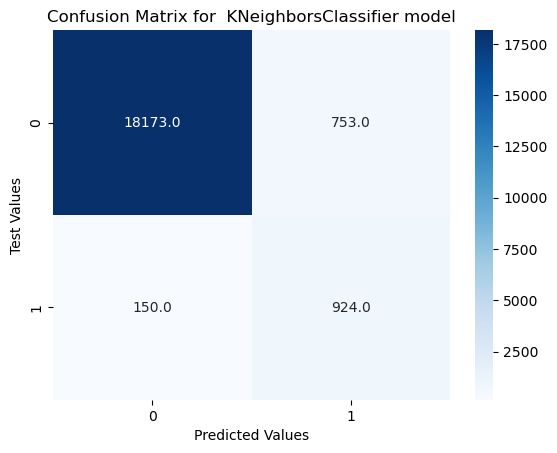

In [123]:
matrix=metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(matrix,annot=True,cmap='Blues',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")
plt.title("Confusion Matrix for  KNeighborsClassifier model")
plt.show()

In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
dtc= DecisionTreeClassifier()

In [166]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [167]:
y_pred=dtc.predict(X_test)

In [129]:
##checking the accuracy

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.9536

In [168]:
##confusion matrix

from sklearn.metrics import confusion_matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
matrix

array([[17835,   439],
       [  488,  1238]], dtype=int64)

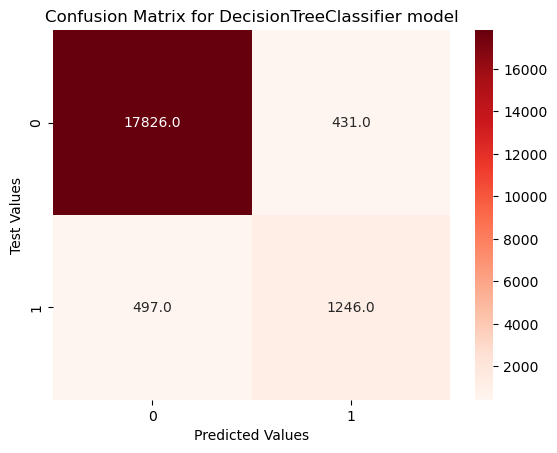

In [130]:
matrix=metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(matrix,annot=True,cmap='Reds',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")
plt.title("Confusion Matrix for DecisionTreeClassifier model")
plt.show()

In [101]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [158]:
##XGBoost Classifier

from xgboost import XGBClassifier

In [159]:
xgb=XGBClassifier()

In [160]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [161]:
y_pred=xgb.predict(X_test)

In [162]:
##checking the accuracy

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.9705

In [107]:
from sklearn import metrics

In [163]:
##confusion matrix

from sklearn.metrics import confusion_matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
matrix

array([[18259,   526],
       [   64,  1151]], dtype=int64)

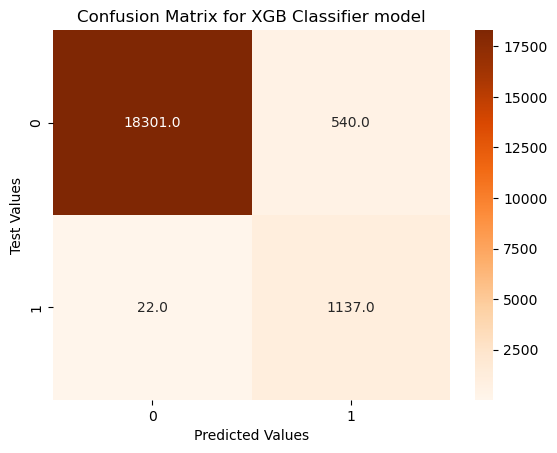

In [139]:
matrix=metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(matrix,annot=True,cmap='Oranges',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")
plt.title("Confusion Matrix for XGB Classifier model")
plt.show()

In [153]:
import lightgbm as lgbm

In [154]:
start_time=time.time()
lgb=lgbm.LGBMClassifier()

In [155]:
lgb.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 6823, number of negative: 73177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085288 -> initscore=-2.372582
[LightGBM] [Info] Start training from score -2.372582


LGBMClassifier()

In [156]:
y_pred=lgb.predict(X_test)

In [136]:
end_time=time.time()

In [137]:
training_time=end_time-start_time

In [138]:
##checking the accuracy

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.9719

In [157]:
##confusion matrix

from sklearn.metrics import confusion_matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
matrix

array([[18301,   540],
       [   22,  1137]], dtype=int64)

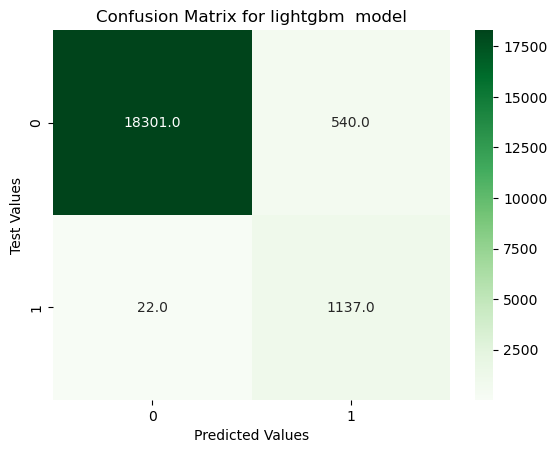

In [141]:
matrix=metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(matrix,annot=True,cmap='Greens',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")
plt.title("Confusion Matrix for lightgbm  model")
plt.show()

In [144]:
from catboost import CatBoostClassifier

In [145]:
cb=CatBoostClassifier()

In [146]:
cb.fit(X_train,y_train)

Learning rate set to 0.06692
0:	learn: 0.5782914	total: 167ms	remaining: 2m 46s
1:	learn: 0.4674042	total: 191ms	remaining: 1m 35s
2:	learn: 0.3731301	total: 216ms	remaining: 1m 11s
3:	learn: 0.3150366	total: 238ms	remaining: 59.2s
4:	learn: 0.2727613	total: 257ms	remaining: 51.1s
5:	learn: 0.2429642	total: 278ms	remaining: 46s
6:	learn: 0.2182477	total: 296ms	remaining: 42s
7:	learn: 0.1845987	total: 315ms	remaining: 39s
8:	learn: 0.1617540	total: 330ms	remaining: 36.3s
9:	learn: 0.1527647	total: 342ms	remaining: 33.8s
10:	learn: 0.1428191	total: 355ms	remaining: 31.9s
11:	learn: 0.1298107	total: 367ms	remaining: 30.2s
12:	learn: 0.1207902	total: 381ms	remaining: 28.9s
13:	learn: 0.1123101	total: 395ms	remaining: 27.8s
14:	learn: 0.1086735	total: 408ms	remaining: 26.8s
15:	learn: 0.1054861	total: 421ms	remaining: 25.9s
16:	learn: 0.1024935	total: 442ms	remaining: 25.6s
17:	learn: 0.0983702	total: 456ms	remaining: 24.9s
18:	learn: 0.0963876	total: 470ms	remaining: 24.3s
19:	learn: 0.09

163:	learn: 0.0758659	total: 2.74s	remaining: 14s
164:	learn: 0.0758362	total: 2.76s	remaining: 14s
165:	learn: 0.0758143	total: 2.77s	remaining: 13.9s
166:	learn: 0.0757872	total: 2.79s	remaining: 13.9s
167:	learn: 0.0757549	total: 2.8s	remaining: 13.9s
168:	learn: 0.0757213	total: 2.82s	remaining: 13.8s
169:	learn: 0.0757009	total: 2.83s	remaining: 13.8s
170:	learn: 0.0756665	total: 2.84s	remaining: 13.8s
171:	learn: 0.0756429	total: 2.86s	remaining: 13.8s
172:	learn: 0.0755850	total: 2.87s	remaining: 13.7s
173:	learn: 0.0755739	total: 2.89s	remaining: 13.7s
174:	learn: 0.0755459	total: 2.9s	remaining: 13.7s
175:	learn: 0.0755203	total: 2.92s	remaining: 13.7s
176:	learn: 0.0754798	total: 2.94s	remaining: 13.7s
177:	learn: 0.0754403	total: 2.96s	remaining: 13.7s
178:	learn: 0.0754109	total: 2.98s	remaining: 13.6s
179:	learn: 0.0753884	total: 2.99s	remaining: 13.6s
180:	learn: 0.0753680	total: 3s	remaining: 13.6s
181:	learn: 0.0753442	total: 3.02s	remaining: 13.6s
182:	learn: 0.0753165

330:	learn: 0.0721736	total: 5.28s	remaining: 10.7s
331:	learn: 0.0721591	total: 5.31s	remaining: 10.7s
332:	learn: 0.0721449	total: 5.33s	remaining: 10.7s
333:	learn: 0.0721320	total: 5.34s	remaining: 10.6s
334:	learn: 0.0721150	total: 5.35s	remaining: 10.6s
335:	learn: 0.0721002	total: 5.37s	remaining: 10.6s
336:	learn: 0.0720786	total: 5.38s	remaining: 10.6s
337:	learn: 0.0720620	total: 5.39s	remaining: 10.6s
338:	learn: 0.0720383	total: 5.41s	remaining: 10.5s
339:	learn: 0.0720128	total: 5.42s	remaining: 10.5s
340:	learn: 0.0720027	total: 5.44s	remaining: 10.5s
341:	learn: 0.0719694	total: 5.45s	remaining: 10.5s
342:	learn: 0.0719390	total: 5.46s	remaining: 10.5s
343:	learn: 0.0719164	total: 5.48s	remaining: 10.4s
344:	learn: 0.0718842	total: 5.5s	remaining: 10.4s
345:	learn: 0.0718633	total: 5.51s	remaining: 10.4s
346:	learn: 0.0718592	total: 5.53s	remaining: 10.4s
347:	learn: 0.0718415	total: 5.54s	remaining: 10.4s
348:	learn: 0.0718179	total: 5.55s	remaining: 10.4s
349:	learn: 0

495:	learn: 0.0693866	total: 7.63s	remaining: 7.75s
496:	learn: 0.0693733	total: 7.65s	remaining: 7.74s
497:	learn: 0.0693615	total: 7.67s	remaining: 7.73s
498:	learn: 0.0693501	total: 7.68s	remaining: 7.71s
499:	learn: 0.0693374	total: 7.69s	remaining: 7.69s
500:	learn: 0.0693290	total: 7.71s	remaining: 7.67s
501:	learn: 0.0693181	total: 7.72s	remaining: 7.66s
502:	learn: 0.0693042	total: 7.73s	remaining: 7.64s
503:	learn: 0.0692907	total: 7.75s	remaining: 7.62s
504:	learn: 0.0692764	total: 7.76s	remaining: 7.61s
505:	learn: 0.0692693	total: 7.77s	remaining: 7.59s
506:	learn: 0.0692538	total: 7.79s	remaining: 7.57s
507:	learn: 0.0692306	total: 7.8s	remaining: 7.55s
508:	learn: 0.0692123	total: 7.81s	remaining: 7.54s
509:	learn: 0.0691962	total: 7.82s	remaining: 7.52s
510:	learn: 0.0691827	total: 7.84s	remaining: 7.51s
511:	learn: 0.0691613	total: 7.86s	remaining: 7.49s
512:	learn: 0.0691474	total: 7.87s	remaining: 7.47s
513:	learn: 0.0691304	total: 7.88s	remaining: 7.46s
514:	learn: 0

665:	learn: 0.0669090	total: 9.96s	remaining: 4.99s
666:	learn: 0.0668955	total: 9.98s	remaining: 4.98s
667:	learn: 0.0668862	total: 9.99s	remaining: 4.96s
668:	learn: 0.0668757	total: 10s	remaining: 4.95s
669:	learn: 0.0668561	total: 10s	remaining: 4.93s
670:	learn: 0.0668413	total: 10s	remaining: 4.92s
671:	learn: 0.0668311	total: 10s	remaining: 4.9s
672:	learn: 0.0668012	total: 10.1s	remaining: 4.89s
673:	learn: 0.0667909	total: 10.1s	remaining: 4.87s
674:	learn: 0.0667804	total: 10.1s	remaining: 4.86s
675:	learn: 0.0667692	total: 10.1s	remaining: 4.84s
676:	learn: 0.0667582	total: 10.1s	remaining: 4.82s
677:	learn: 0.0667454	total: 10.1s	remaining: 4.81s
678:	learn: 0.0667224	total: 10.1s	remaining: 4.79s
679:	learn: 0.0667062	total: 10.1s	remaining: 4.78s
680:	learn: 0.0666914	total: 10.2s	remaining: 4.76s
681:	learn: 0.0666711	total: 10.2s	remaining: 4.75s
682:	learn: 0.0666546	total: 10.2s	remaining: 4.73s
683:	learn: 0.0666442	total: 10.2s	remaining: 4.71s
684:	learn: 0.0666301

834:	learn: 0.0646245	total: 12.3s	remaining: 2.42s
835:	learn: 0.0646121	total: 12.3s	remaining: 2.41s
836:	learn: 0.0645947	total: 12.3s	remaining: 2.4s
837:	learn: 0.0645828	total: 12.3s	remaining: 2.38s
838:	learn: 0.0645722	total: 12.3s	remaining: 2.37s
839:	learn: 0.0645631	total: 12.3s	remaining: 2.35s
840:	learn: 0.0645534	total: 12.4s	remaining: 2.34s
841:	learn: 0.0645404	total: 12.4s	remaining: 2.32s
842:	learn: 0.0645295	total: 12.4s	remaining: 2.31s
843:	learn: 0.0645190	total: 12.4s	remaining: 2.29s
844:	learn: 0.0645159	total: 12.4s	remaining: 2.28s
845:	learn: 0.0645075	total: 12.4s	remaining: 2.26s
846:	learn: 0.0645011	total: 12.4s	remaining: 2.25s
847:	learn: 0.0644885	total: 12.4s	remaining: 2.23s
848:	learn: 0.0644807	total: 12.5s	remaining: 2.22s
849:	learn: 0.0644689	total: 12.5s	remaining: 2.2s
850:	learn: 0.0644594	total: 12.5s	remaining: 2.19s
851:	learn: 0.0644368	total: 12.5s	remaining: 2.17s
852:	learn: 0.0644134	total: 12.5s	remaining: 2.16s
853:	learn: 0.

In [147]:
y_pred=cb.predict(X_test)

In [148]:
##checking the accuracy

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.9701

In [152]:
##confusion matrix

from sklearn.metrics import confusion_matrix
matrix=metrics.confusion_matrix(y_pred,y_test)
matrix

array([[18257,   532],
       [   66,  1145]], dtype=int64)

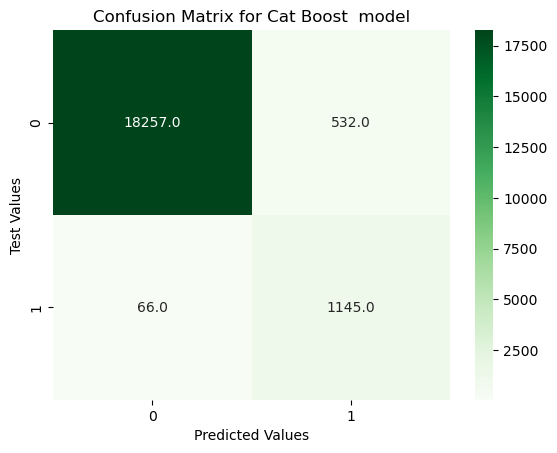

In [149]:
matrix=metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(matrix,annot=True,cmap='Greens',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")
plt.title("Confusion Matrix for Cat Boost  model")
plt.show()

Accuracy:
     GaussianNB:90.54
     LogisticRegression:95.93
     SVC:94.84
     KNeighborsClassifier:95.45
     DecisionTreeClassifier:95.36
     XGBClassifier:97.05
     LGBMClassifier:97.19
     CatBoostClassifier:97.01

Thus,from the above results,we can conclude that Logistic Regression model has the best accuracy.